In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# 1. 加载数据
df = pd.read_csv('data1.csv')  # 请确保文件路径正确

# 2. 数据预处理
X = df.drop('Y(1=default, 0=non-default)', axis=1)  # 假设'Target'是目标变量
y = df['Y(1=default, 0=non-default)']

# 3. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 应用PCA
pca = PCA(n_components=0.95)  # 保留95%的方差
X_pca = pca.fit_transform(X_scaled)

# 5. 应用Lasso回归
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  # alpha参数可以调整
lasso.fit(X_train, y_train)

# 6. 获取特征重要性
feature_importance = np.abs(lasso.coef_)

# 7. 选择重要特征
threshold = np.percentile(feature_importance, 75)  # 选择前25%的特征
selected_features = feature_importance >= threshold

# 8. 获取原始特征的重要性
original_feature_importance = pca.components_.T.dot(lasso.coef_)
original_feature_importance = np.abs(original_feature_importance)

# 9. 选择原始特征
original_selected_features = original_feature_importance >= np.percentile(original_feature_importance, 75)

# 10. 打印结果
print("Selected PCA components:", np.sum(selected_features))
print("Selected original features:", np.sum(original_selected_features))
print("Selected original feature indices:", np.where(original_selected_features)[0])

# 11. 获取选择的原始特征名称
selected_feature_names = X.columns[original_selected_features].tolist()
print("Selected original feature names:", selected_feature_names)

# 12. 输出每个特征的重要性分数
feature_importance_dict = dict(zip(X.columns, original_feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("\nFeature importance scores:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Selected PCA components: 20
Selected original features: 6
Selected original feature indices: [ 0  2  4 16 19 20]
Selected original feature names: ['X1', 'X3', 'X5', 'X17', 'X20', 'X21']

Feature importance scores:
X1: 0.027222003612122757
X3: 0.021307511804196995
X21: 0.0181533541922419
X5: 0.017359574212547583
X20: 0.01584873454790492
X17: 0.013839452906746538
X16: 0.013081722482958368
X12: 0.012203361735298497
X6: 0.011044137653224848
X10: 0.010007848707639697
X9: 0.008818956557605773
X23: 0.008549956527096574
X24: 0.007778129324341265
X14: 0.007105119804370108
X22: 0.0065041223764089225
X18: 0.006502440062565641
X11: 0.006468965376182574
X7: 0.006135191800906276
X19: 0.004828988189692801
X15: 0.0026615813020805044
X2: 0.002237377697769116
X13: 0.001594354809371464
X8: 0.0013388559428329492
X4: 0.0005581056833122745


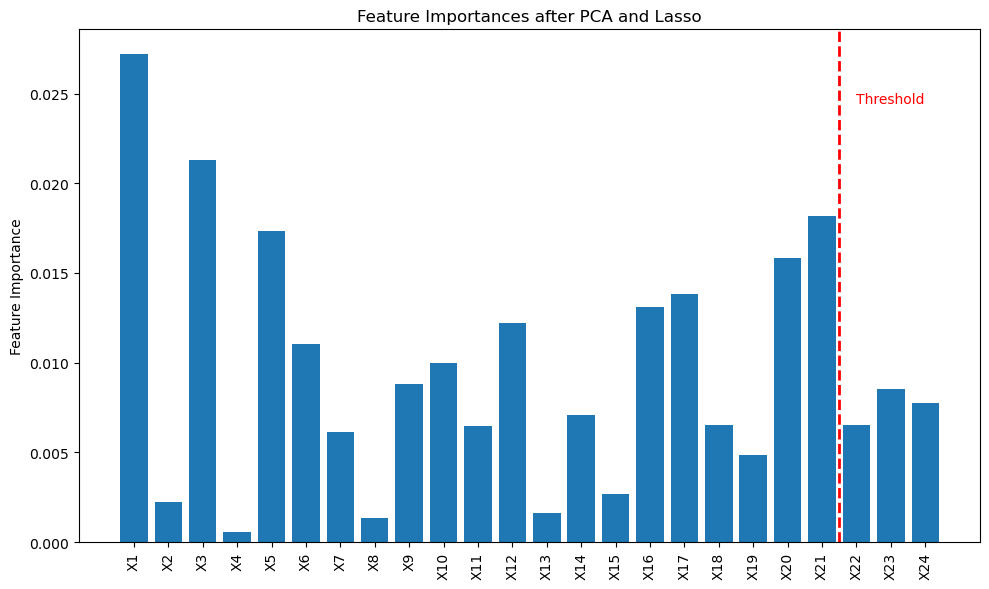

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ... (之前的代码保持不变)

# 12. 可视化特征重要性
plt.figure(figsize=(10, 6))

# 绘制条形图
indices = np.arange(len(original_feature_importance))
plt.bar(indices, original_feature_importance, align='center')

# 添加特征名称和重要性分数
plt.xticks(indices, X.columns, rotation='vertical')
plt.ylabel('Feature Importance')
plt.title('Feature Importances after PCA and Lasso')

# 显示特征重要性阈值线
plt.axvline(x=np.where(original_selected_features)[0][-1] + 0.5, color='r', linestyle='--', linewidth=2)
plt.text(np.where(original_selected_features)[0][-1] + 1, max(original_feature_importance) * 0.9, 'Threshold', color='red')

# 展示图形
plt.tight_layout()
plt.show()

# ... (之后的代码保持不变)

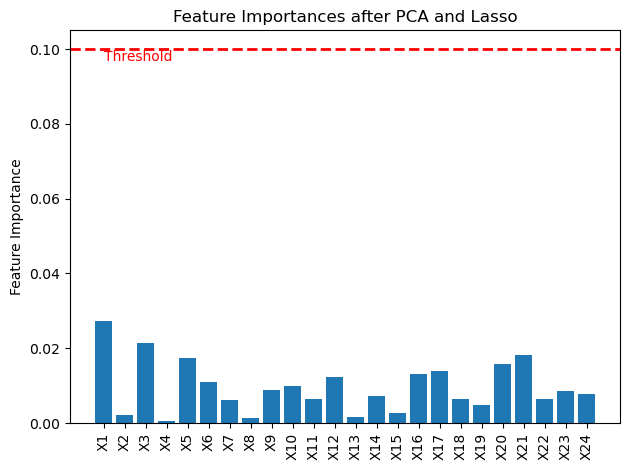

In [7]:
import matplotlib.pyplot as plt

# 假设你已经有了一个固定的阈值分数
fixed_threshold = 0.1  # 你可以设置这个值为你想要的任何分数

# ... (之前的代码保持不变)

# 绘制条形图
indices = np.arange(len(original_feature_importance))
plt.bar(indices, original_feature_importance, align='center')

# 添加特征名称和重要性分数
plt.xticks(indices, X.columns, rotation='vertical')
plt.ylabel('Feature Importance')
plt.title('Feature Importances after PCA and Lasso')

# 显示水平线表示固定的阈值
plt.axhline(y=fixed_threshold, color='r', linestyle='--', linewidth=2)
plt.text(0, fixed_threshold - 0.01 * max(original_feature_importance), 'Threshold', color='red', va='top')

# # 如果你还想要显示选择的特征的边界（基于百分比的阈值）
# selected_index = np.where(original_selected_features)[0][-1]
# plt.axvline(x=selected_index + 0.5, color='g', linestyle='--', linewidth=2)
# plt.text(selected_index + 1, max(original_feature_importance) * 0.9, 'Selected Features Threshold', color='green')

# 展示图形
plt.tight_layout()
plt.show()